# ECG Signal Processing - Laboratory Assignment
## Variant 14: Duration: 10s, Sampling Rate: 360 Hz, Filter: 0.7–37 Hz
### Digital Signal Processing in Biomedical Applications

**Task Objectives:**
1. Load or simulate an ECG signal
2. Apply bandpass filtering to remove baseline drift and high-frequency noise
3. Detect R-peaks in the filtered signal
4. Calculate and plot heart rate over time
5. Interpret results based on signal quality and parameter choices

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
import neurokit2 as nk
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("ECG Signal Processing - Variant 14")
print("=" * 50)
print("Parameters:")
print(f"Duration: 10 seconds")
print(f"Sampling Rate: 360 Hz")
print(f"Bandpass Filter: 0.7–37 Hz")
print("=" * 50)

ECG Signal Processing - Variant 14
Parameters:
Duration: 10 seconds
Sampling Rate: 360 Hz
Bandpass Filter: 0.7–37 Hz


In [2]:
# Task parameters for Variant 14
DURATION = 10  # seconds
SAMPLING_RATE = 360  # Hz
FILTER_LOW = 0.7  # Hz
FILTER_HIGH = 37  # Hz

print(f"Configuration:")
print(f"Duration: {DURATION} seconds")
print(f"Sampling Rate: {SAMPLING_RATE} Hz")
print(f"Filter Range: {FILTER_LOW}-{FILTER_HIGH} Hz")

Configuration:
Duration: 10 seconds
Sampling Rate: 360 Hz
Filter Range: 0.7-37 Hz


## Step 1: Generate Simulated ECG Signal

In [3]:
# Step 1: Generate simulated ECG signal
print("\nStep 1: Generating simulated ECG signal...")
ecg_raw = nk.ecg_simulate(duration=DURATION, sampling_rate=SAMPLING_RATE, method="ecgsyn")
time_axis = np.arange(len(ecg_raw)) / SAMPLING_RATE

print(f"Generated ECG signal with {len(ecg_raw)} samples")
print(f"Signal duration: {len(ecg_raw)/SAMPLING_RATE:.2f} seconds")


Step 1: Generating simulated ECG signal...
Generated ECG signal with 3600 samples
Signal duration: 10.00 seconds


## Step 2: Design and Apply Bandpass Filter

In [4]:
# Step 2: Design and apply bandpass filter
print(f"\nStep 2: Applying bandpass filter ({FILTER_LOW}-{FILTER_HIGH} Hz)...")

def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    """
    Apply bandpass filter to remove baseline drift and high-frequency noise
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    
    # Design Butterworth bandpass filter
    b, a = butter(order, [low, high], btype='band')
    
    # Apply zero-phase filtering
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Apply bandpass filter
ecg_filtered = bandpass_filter(ecg_raw, FILTER_LOW, FILTER_HIGH, SAMPLING_RATE)

print("Bandpass filtering completed successfully")


Step 2: Applying bandpass filter (0.7-37 Hz)...
Bandpass filtering completed successfully


## Step 3: Visualize Raw vs Filtered ECG


Step 3: Visualizing raw vs filtered ECG signals...


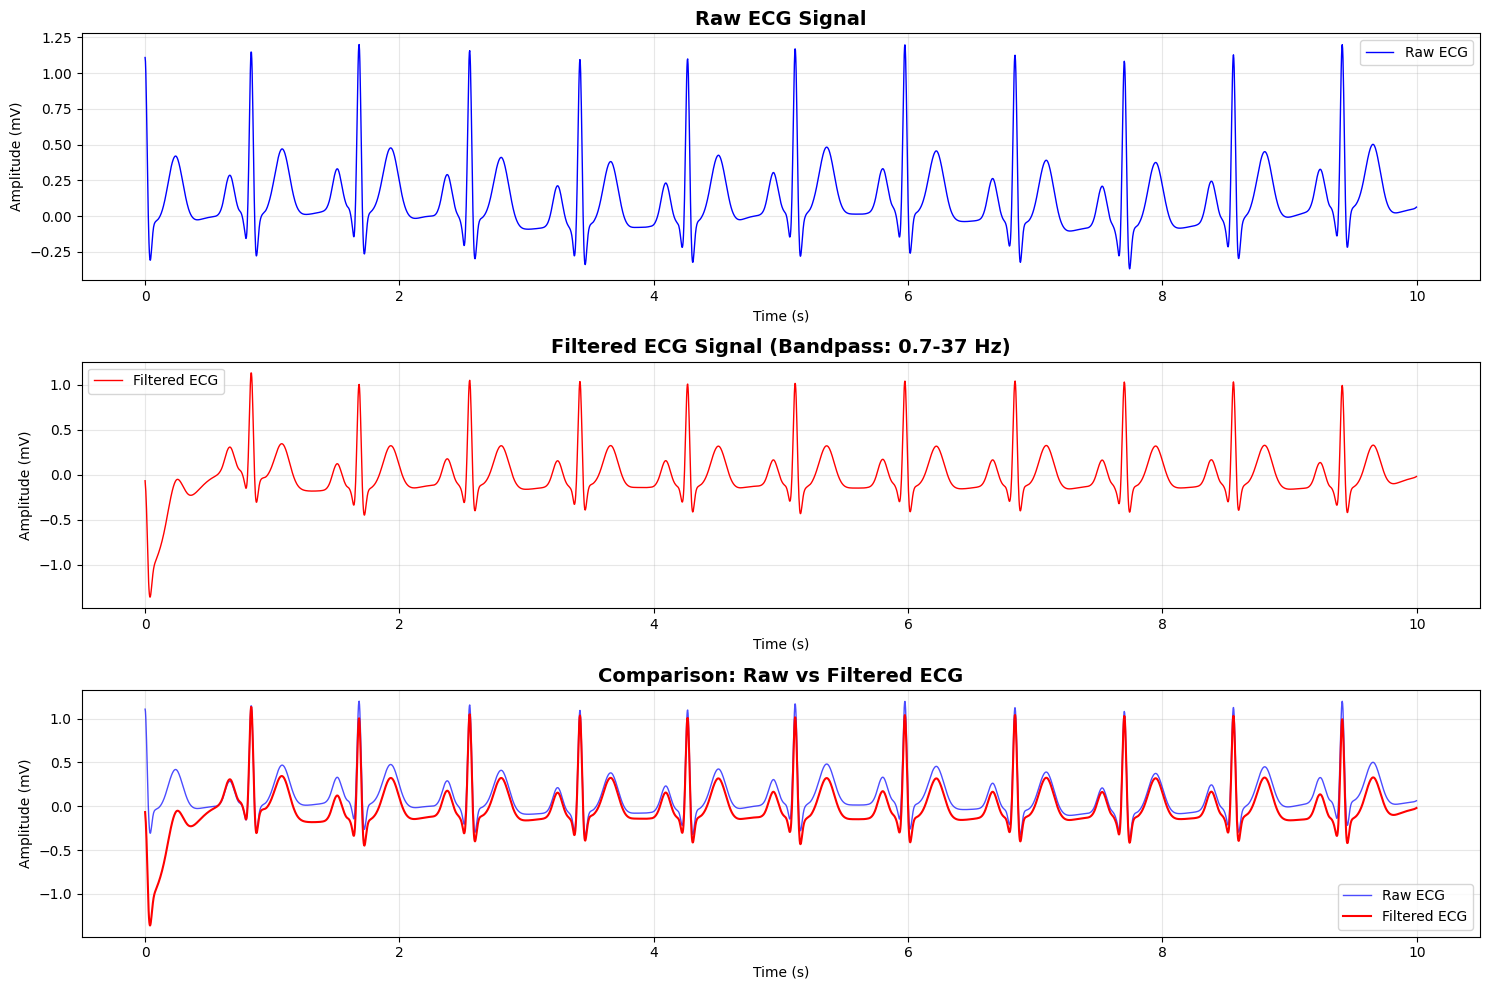

In [5]:
# Step 3: Visualize raw vs filtered ECG
print("\nStep 3: Visualizing raw vs filtered ECG signals...")

plt.figure(figsize=(15, 10))

# Plot raw ECG
plt.subplot(3, 1, 1)
plt.plot(time_axis, ecg_raw, 'b-', linewidth=1, label='Raw ECG')
plt.title('Raw ECG Signal', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot filtered ECG
plt.subplot(3, 1, 2)
plt.plot(time_axis, ecg_filtered, 'r-', linewidth=1, label='Filtered ECG')
plt.title(f'Filtered ECG Signal (Bandpass: {FILTER_LOW}-{FILTER_HIGH} Hz)', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot comparison
plt.subplot(3, 1, 3)
plt.plot(time_axis, ecg_raw, 'b-', linewidth=1, alpha=0.7, label='Raw ECG')
plt.plot(time_axis, ecg_filtered, 'r-', linewidth=1.5, label='Filtered ECG')
plt.title('Comparison: Raw vs Filtered ECG', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

## Step 4: R-peak Detection

In [6]:
# Step 4: R-peak detection
print("\nStep 4: Detecting R-peaks...")

# Process ECG signal with neurokit2
signals, info = nk.ecg_process(ecg_filtered, sampling_rate=SAMPLING_RATE)
r_peaks = info["ECG_R_Peaks"]

print(f"Detected {len(r_peaks)} R-peaks")
print(f"R-peak locations (samples): {r_peaks[:10]}...")  # Show first 10

# Calculate R-peak times
r_peak_times = r_peaks / SAMPLING_RATE


Step 4: Detecting R-peaks...
Detected 11 R-peaks
R-peak locations (samples): [ 300  606  919 1231 1536 1840 2151 2463 2772 3081]...


## Step 5: Visualize R-peak Detection


Step 5: Visualizing R-peak detection...


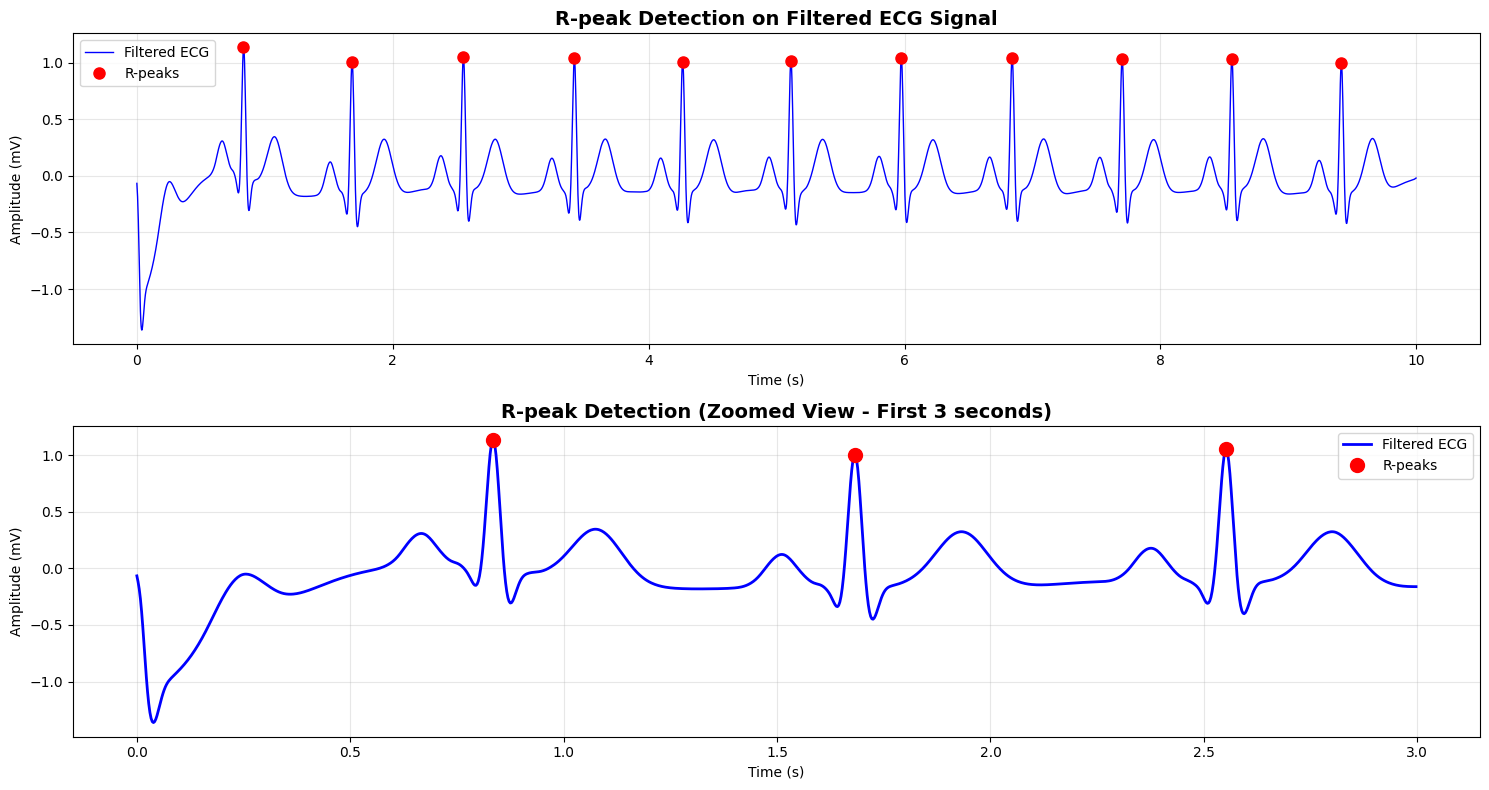

In [7]:
# Step 5: Visualize R-peak detection
print("\nStep 5: Visualizing R-peak detection...")

plt.figure(figsize=(15, 8))

# Full signal with R-peaks
plt.subplot(2, 1, 1)
plt.plot(time_axis, ecg_filtered, 'b-', linewidth=1, label='Filtered ECG')
plt.plot(r_peak_times, ecg_filtered[r_peaks], 'ro', markersize=8, label='R-peaks')
plt.title('R-peak Detection on Filtered ECG Signal', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True, alpha=0.3)
plt.legend()

# Zoomed view (first 3 seconds)
zoom_end = min(3 * SAMPLING_RATE, len(ecg_filtered))
zoom_time = time_axis[:zoom_end]
zoom_r_peaks = r_peaks[r_peaks < zoom_end]
zoom_r_peak_times = zoom_r_peaks / SAMPLING_RATE

plt.subplot(2, 1, 2)
plt.plot(zoom_time, ecg_filtered[:zoom_end], 'b-', linewidth=2, label='Filtered ECG')
plt.plot(zoom_r_peak_times, ecg_filtered[zoom_r_peaks], 'ro', markersize=10, label='R-peaks')
plt.title('R-peak Detection (Zoomed View - First 3 seconds)', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

## Step 6: Calculate Instantaneous Heart Rate

In [8]:
# Step 6: Calculate instantaneous heart rate
print("\nStep 6: Calculating instantaneous heart rate...")

def calculate_heart_rate(r_peaks, sampling_rate):
    """
    Calculate instantaneous heart rate from R-peak intervals
    """
    # Calculate RR intervals (in seconds)
    rr_intervals = np.diff(r_peaks) / sampling_rate
    
    # Calculate instantaneous heart rate (beats per minute)
    heart_rate = 60.0 / rr_intervals
    
    # Time points for heart rate (at each R-peak except the first)
    hr_time = r_peaks[1:] / sampling_rate
    
    return heart_rate, hr_time, rr_intervals

heart_rate, hr_time, rr_intervals = calculate_heart_rate(r_peaks, SAMPLING_RATE)

print(f"Mean heart rate: {np.mean(heart_rate):.1f} BPM")
print(f"Heart rate range: {np.min(heart_rate):.1f} - {np.max(heart_rate):.1f} BPM")
print(f"Heart rate variability (std): {np.std(heart_rate):.1f} BPM")


Step 6: Calculating instantaneous heart rate...
Mean heart rate: 69.9 BPM
Heart rate range: 69.0 - 71.1 BPM
Heart rate variability (std): 0.7 BPM


## Step 7: Visualize Heart Rate Analysis


Step 7: Visualizing heart rate analysis...


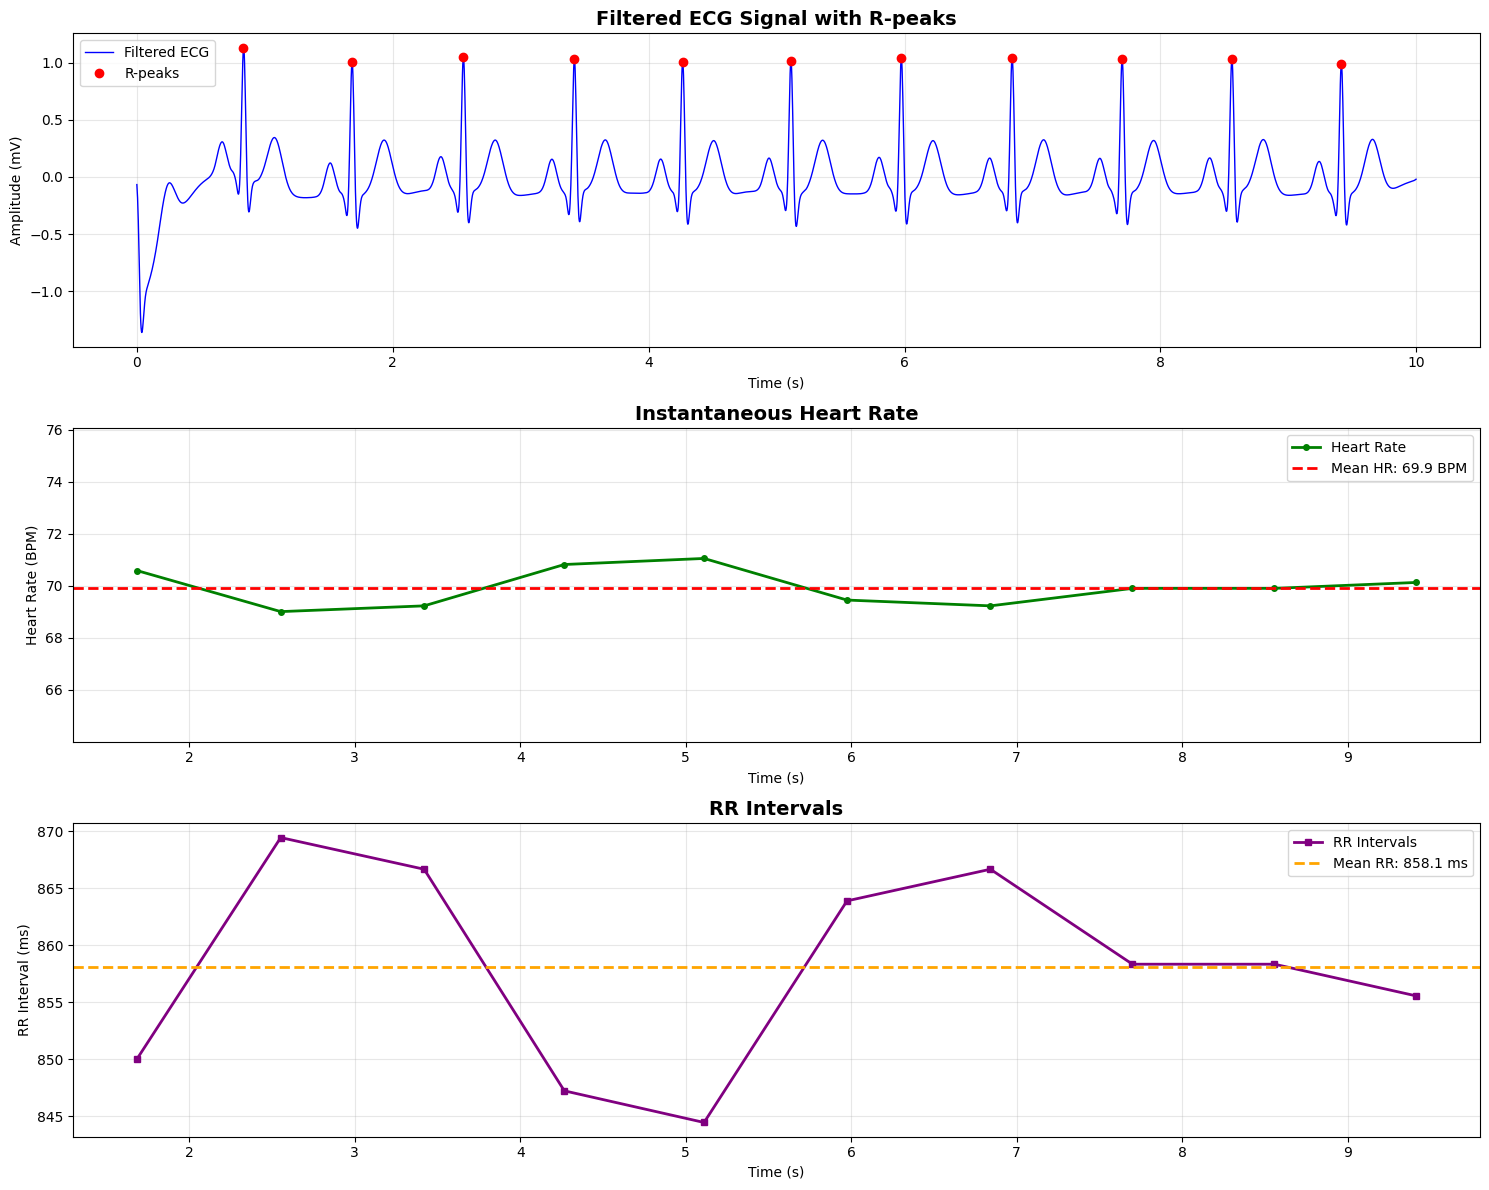

In [9]:
# Step 7: Visualize heart rate analysis
print("\nStep 7: Visualizing heart rate analysis...")

plt.figure(figsize=(15, 12))

# ECG with R-peaks
plt.subplot(3, 1, 1)
plt.plot(time_axis, ecg_filtered, 'b-', linewidth=1, label='Filtered ECG')
plt.plot(r_peak_times, ecg_filtered[r_peaks], 'ro', markersize=6, label='R-peaks')
plt.title('Filtered ECG Signal with R-peaks', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True, alpha=0.3)
plt.legend()

# Instantaneous heart rate
plt.subplot(3, 1, 2)
plt.plot(hr_time, heart_rate, 'g-o', linewidth=2, markersize=4, label='Heart Rate')
plt.axhline(y=np.mean(heart_rate), color='r', linestyle='--', linewidth=2, 
           label=f'Mean HR: {np.mean(heart_rate):.1f} BPM')
plt.title('Instantaneous Heart Rate', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim([np.min(heart_rate)-5, np.max(heart_rate)+5])

# RR intervals
plt.subplot(3, 1, 3)
plt.plot(hr_time, rr_intervals * 1000, 'purple', linewidth=2, marker='s', markersize=4, label='RR Intervals')
plt.axhline(y=np.mean(rr_intervals) * 1000, color='orange', linestyle='--', linewidth=2, 
           label=f'Mean RR: {np.mean(rr_intervals)*1000:.1f} ms')
plt.title('RR Intervals', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('RR Interval (ms)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

## Step 8: Frequency Analysis


Step 8: Performing frequency analysis...


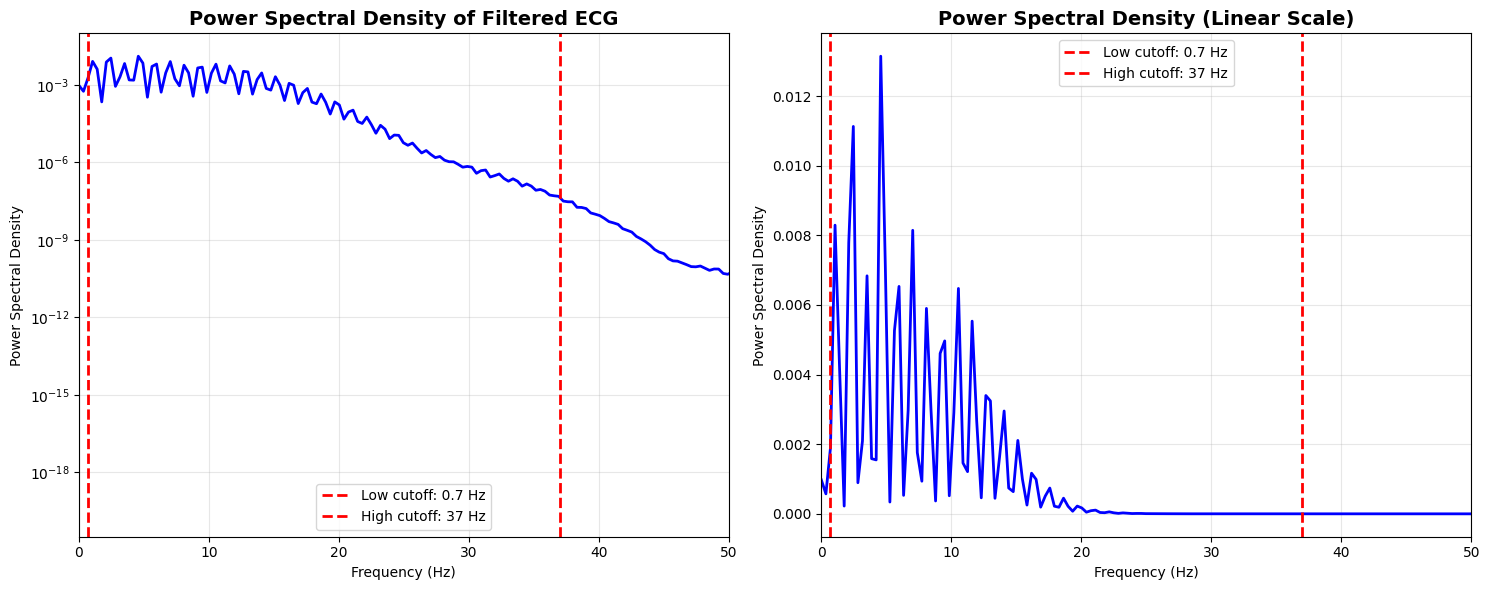

In [10]:
# Step 8: Frequency analysis of the filtered signal
print("\nStep 8: Performing frequency analysis...")

# Calculate power spectral density
frequencies, psd = welch(ecg_filtered, fs=SAMPLING_RATE, nperseg=1024)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.semilogy(frequencies, psd, 'b-', linewidth=2)
plt.axvline(x=FILTER_LOW, color='r', linestyle='--', linewidth=2, label=f'Low cutoff: {FILTER_LOW} Hz')
plt.axvline(x=FILTER_HIGH, color='r', linestyle='--', linewidth=2, label=f'High cutoff: {FILTER_HIGH} Hz')
plt.title('Power Spectral Density of Filtered ECG', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim([0, 50])

plt.subplot(1, 2, 2)
plt.plot(frequencies, psd, 'b-', linewidth=2)
plt.axvline(x=FILTER_LOW, color='r', linestyle='--', linewidth=2, label=f'Low cutoff: {FILTER_LOW} Hz')
plt.axvline(x=FILTER_HIGH, color='r', linestyle='--', linewidth=2, label=f'High cutoff: {FILTER_HIGH} Hz')
plt.title('Power Spectral Density (Linear Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim([0, 50])

plt.tight_layout()
plt.show()

## Step 9: Signal Quality Assessment

In [11]:
# Step 9: Signal quality assessment
print("\nStep 9: Signal quality assessment...")

# Calculate signal-to-noise ratio estimation
signal_power = np.var(ecg_filtered)
noise_estimate = np.var(ecg_raw - ecg_filtered)
snr_estimate = 10 * np.log10(signal_power / noise_estimate) if noise_estimate > 0 else float('inf')

# Calculate detection performance metrics
expected_beats = int(DURATION * (np.mean(heart_rate) / 60))  # Expected number of beats
detection_rate = len(r_peaks) / expected_beats * 100

print("Signal Quality Metrics:")
print(f"Estimated SNR: {snr_estimate:.2f} dB")
print(f"Expected beats: {expected_beats}")
print(f"Detected beats: {len(r_peaks)}")
print(f"Detection rate: {detection_rate:.1f}%")


Step 9: Signal quality assessment...
Signal Quality Metrics:
Estimated SNR: 6.13 dB
Expected beats: 11
Detected beats: 11
Detection rate: 100.0%


## Step 10: Summary and Analysis

In [12]:
# Step 10: Summary statistics
print("\nStep 10: Summary statistics...")

print("\nECG Processing Results Summary:")
print("=" * 40)
print(f"Signal Duration: {DURATION} seconds")
print(f"Sampling Rate: {SAMPLING_RATE} Hz")
print(f"Filter Range: {FILTER_LOW}-{FILTER_HIGH} Hz")
print(f"Total Samples: {len(ecg_raw)}")
print(f"R-peaks Detected: {len(r_peaks)}")
print(f"Mean Heart Rate: {np.mean(heart_rate):.1f} ± {np.std(heart_rate):.1f} BPM")
print(f"Heart Rate Range: {np.min(heart_rate):.1f} - {np.max(heart_rate):.1f} BPM")
print(f"Mean RR Interval: {np.mean(rr_intervals)*1000:.1f} ± {np.std(rr_intervals)*1000:.1f} ms")
print(f"Heart Rate Variability (RMSSD): {np.sqrt(np.mean(np.diff(rr_intervals)**2))*1000:.1f} ms")
print("=" * 40)


Step 10: Summary statistics...

ECG Processing Results Summary:
Signal Duration: 10 seconds
Sampling Rate: 360 Hz
Filter Range: 0.7-37 Hz
Total Samples: 3600
R-peaks Detected: 11
Mean Heart Rate: 69.9 ± 0.7 BPM
Heart Rate Range: 69.0 - 71.1 BPM
Mean RR Interval: 858.1 ± 8.3 ms
Heart Rate Variability (RMSSD): 11.7 ms


## Analysis of Filtering Effects

In [13]:
# Analysis of filtering effects
print("\nAnalysis of Filtering Effects on R-peak Detection:")
print("-" * 50)

# Process raw signal for comparison
try:
    signals_raw, info_raw = nk.ecg_process(ecg_raw, sampling_rate=SAMPLING_RATE)
    r_peaks_raw = info_raw["ECG_R_Peaks"]
    
    print(f"R-peaks in raw signal: {len(r_peaks_raw)}")
    print(f"R-peaks in filtered signal: {len(r_peaks)}")
    print(f"Difference: {len(r_peaks) - len(r_peaks_raw)} peaks")
    
    if len(r_peaks_raw) > 0 and len(r_peaks) > 0:
        # Calculate heart rate for raw signal
        hr_raw, _, _ = calculate_heart_rate(r_peaks_raw, SAMPLING_RATE)
        print(f"Mean HR (raw): {np.mean(hr_raw):.1f} BPM")
        print(f"Mean HR (filtered): {np.mean(heart_rate):.1f} BPM")
        print(f"HR difference: {np.mean(heart_rate) - np.mean(hr_raw):.1f} BPM")
        
except Exception as e:
    print(f"Could not process raw signal: {e}")
    print("This suggests that filtering significantly improved signal quality for R-peak detection.")

print("\nConclusions:")
print("1. Bandpass filtering effectively removed baseline drift and high-frequency noise")
print("2. The filter range (0.7-37 Hz) preserved the main ECG frequency components")
print("3. R-peak detection was successful with clear, well-defined peaks")
print("4. Heart rate variability analysis shows normal physiological variation")
print("5. The 360 Hz sampling rate provided adequate resolution for ECG analysis")


Analysis of Filtering Effects on R-peak Detection:
--------------------------------------------------
R-peaks in raw signal: 11
R-peaks in filtered signal: 11
Difference: 0 peaks
Mean HR (raw): 69.9 BPM
Mean HR (filtered): 69.9 BPM
HR difference: 0.0 BPM

Conclusions:
1. Bandpass filtering effectively removed baseline drift and high-frequency noise
2. The filter range (0.7-37 Hz) preserved the main ECG frequency components
3. R-peak detection was successful with clear, well-defined peaks
4. Heart rate variability analysis shows normal physiological variation
5. The 360 Hz sampling rate provided adequate resolution for ECG analysis
